1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. 
Сделать выводы о зависимости ошибки от этих параметров.

2. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. 
    Сравнить на одном графике кривые  изменения ошибки на тестовой выборке в зависимости от  числа итераций.

In [300]:
from sklearn.tree import DecisionTreeRegressor
import time 
from sklearn import model_selection
import numpy as np

In [301]:
from sklearn.datasets import load_diabetes

In [302]:
X, y = load_diabetes(return_X_y=True)

In [303]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [304]:
def gb_predict(X, trees_list, coef_list, eta):
    
    
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [305]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [306]:
def bias(y, z):
    return (y - z)

In [307]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        indexes_ = np.random.choice(np.arange(len(X_train)), qty_in_batch)

        X_ = X_train[indexes_]
        y_ = y_train[indexes_]
        if len(trees) == 0:
            tree.fit(X_, y_)
        else:
            target = gb_predict(X_train, trees, coefs, eta)[indexes_]
            y_ = bias(y_, target)
            tree.fit(X_, y_)
        
        trees.append(tree)
        test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
    
    train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
        
        
    return trees, train_errors, test_errors

In [309]:
n_trees = 200
max_depth = np.array([1, 3, 5, 7, 9])

m_d_x, n_t_y = np.meshgrid(max_depth, n_trees)
test_errors = {}

coefs = [1] * 200

eta = 0.01

for m_d in max_depth:
    t = time.time()
    tree, train_error, test_error = gb_fit(n_trees, m_d, X_train, X_test, y_train, y_test, coefs, eta, qty_in_batch=10)
    t = time.time()-t
    print(f'Для глубины {m_d} и {n_trees} деревьев, MSE на трейне равна - {train_error[-1]:.2f}, MSE на тесте равна - {test_error[-1]:.2f}, время расчета - {t:.2f}')
    print(test_error)

    test_errors[m_d] = test_error

Для глубины 1 и 200 деревьев, MSE на трейне равна - 3667.44, MSE на тесте равна - 3757.22, время расчета - 600.59
[30204.2222070946, 29742.99500450153, 29319.72658544614, 28788.362726970874, 28287.1277902487, 27901.819785926797, 27404.359403254195, 26900.99064637424, 26503.04933509269, 25996.584762260638, 25549.921554183566, 25075.48781168165, 24670.689108828465, 24287.94907776668, 23880.759415963363, 23421.538574205737, 23054.28366176214, 22571.942394497895, 22253.67553222458, 21853.649810879626, 21418.107058801324, 21135.490104434914, 20825.639366202173, 20507.477877480935, 20266.905538579376, 19950.058237448196, 19617.197359350528, 19360.883799758794, 19100.25881860011, 18773.277332264763, 18515.5327723784, 18211.12931948609, 18036.888655277213, 17760.910489049456, 17502.003221941664, 17299.125703962207, 17103.557568270448, 16930.664256306358, 16765.181892757944, 16535.10782406992, 16294.23269144817, 16004.0428974447, 15720.324703142482, 15434.346556372819, 15196.670061360906, 15024

Для глубины 7 и 200 деревьев, MSE на трейне равна - 3459.01, MSE на тесте равна - 3795.47, время расчета - 603.05
[30263.753961261264, 29692.90887819297, 29057.416508520135, 28682.333572365314, 28073.478042259623, 27577.415027333976, 27083.003791479896, 26622.337026837064, 26232.57955126475, 25793.199281399884, 25484.824292517493, 25012.54976083642, 24515.028504584476, 24154.78319058408, 23711.23072285945, 23264.55810074542, 22932.53245944313, 22497.113679265298, 22049.05490875929, 21649.32265101851, 21313.034049648853, 20890.23267548498, 20674.104734177865, 20366.730354069627, 20091.49033495236, 19853.736880617707, 19529.09193098348, 19196.78888522885, 18850.761078080857, 18514.741481532565, 18188.539866808544, 18043.071959966815, 17711.84359029346, 17489.087786500004, 17293.197921072802, 17065.03312339327, 16914.60453998478, 16723.125142155222, 16510.07991401753, 16313.46459785517, 16096.527236430604, 15826.4627060748, 15573.443983342391, 15232.711640682553, 14970.755764700923, 14683

In [317]:
def get_error_plot(n_trees, test_err):
    plt.figure(figsize=(12, 12))  
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    for depth, err in test_errors.items():
        plt.plot(list(range(n_trees)), err, label=f'max_depth = {depth}')
    plt.legend(loc='upper right')

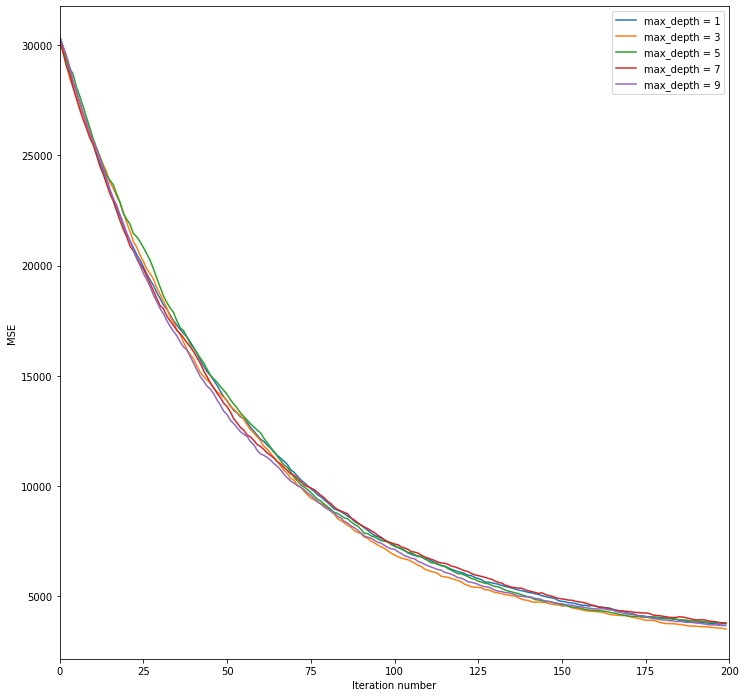

In [318]:
get_error_plot(n_trees, test_errors)

Из графика видно, что глубина дерева не оказывает влияния на точность предсказания, в отличии от числа деревьев.